In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/My Drive/Semestre 7/IA-1/Proyecto

Mounted at /content/drive/
/content/drive/My Drive/Semestre 7/IA-1/Proyecto


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm
from math import floor  

In [3]:
df=pd.read_csv('./Files/Data/sp500_beta.csv',parse_dates=True)

In [4]:
print("Head:")
print(df.head())
print("\n Stats:")
print(df.describe())
print("\n Shape:")
print(df.shape)
print("\n Add_info:")
print(df.info())


Head:
         Date      Open      High       Low     Close
0  04/09/2021  4,096.11  4,129.48  4,095.51  4,128.80
1  04/08/2021  4,089.95  4,098.19  4,082.54  4,097.17
2  04/07/2021  4,074.29  4,083.13  4,068.31  4,079.95
3  04/06/2021  4,075.57  4,086.23  4,068.14  4,073.94
4  04/05/2021  4,034.44  4,083.42  4,034.44  4,077.91

 Stats:
              Date      Open      High       Low     Close
count          251       251       251       251       251
unique         251       251       251       251       251
top     04/22/2020  3,764.61  3,220.39  3,076.06  3,169.94
freq             1         1         1         1         1

 Shape:
(251, 5)

 Add_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    251 non-null    object
 1   Open    251 non-null    object
 2   High    251 non-null    object
 3   Low     251 non-null    object
 4   Close   251

In [5]:
#We need to replace de commas with null spaces to use "astype"
df.replace(',','',regex=True, inplace=True)
df.replace('/','',regex=True, inplace=True)
df.head()

,Date,Open,High,Low,Close
0,04092021,4096.11,4129.48,4095.51,4128.80
1,04082021,4089.95,4098.19,4082.54,4097.17
2,04072021,4074.29,4083.13,4068.31,4079.95
3,04062021,4075.57,4086.23,4068.14,4073.94
4,04052021,4034.44,4083.42,4034.44,4077.91


In [6]:
df.High=df.High.astype('float32')
df.Low=df.Low.astype('float32')
df.Open=df.Open.astype('float32')
df.Close=df.Close.astype('float32')
df['Date'] = pd.to_datetime(df['Date'],format='%m%d%Y')

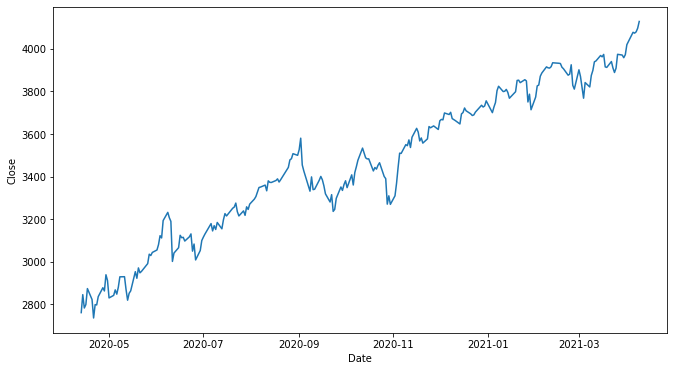

In [7]:
plt.figure(figsize=(11,6))
sns.lineplot(x=df.Date,y=df.Close)

In [8]:
df['Volatility']= (df.High.astype('float32') - df.Low.astype('float32'))/df.Open.astype('float32')
df['Displacement']= (df.Close.astype('float32') - df.Open.astype('float32'))/df.Open.astype('float32')
df['Date'] = pd.to_datetime(df['Date'],format='%m%d%Y')

df.head(10)

,Date,Open,High,Low,Close,Volatility,Displacement
0,2021-04-09,4096.109863,4129.479980,4095.510010,4128.799805,0.008293,0.007981
1,2021-04-08,4089.949951,4098.189941,4082.540039,4097.169922,0.003826,0.001765
2,2021-04-07,4074.290039,4083.129883,4068.310059,4079.949951,0.003637,0.001389
3,2021-04-06,4075.570068,4086.229980,4068.139893,4073.939941,0.004439,-0.000400
4,2021-04-05,4034.439941,4083.419922,4034.439941,4077.909912,0.012140,0.010775
5,2021-04-01,3992.780029,4020.629883,3992.780029,4019.870117,0.006975,0.006785
6,2021-03-31,3967.250000,3994.409912,3966.979980,3972.889893,0.006914,0.001422
7,2021-03-30,3963.340088,3968.010010,3944.350098,3958.550049,0.005970,-0.001209
8,2021-03-29,3969.310059,3981.830078,3943.250000,3971.090088,0.009720,0.000448
9,2021-03-26,3917.120117,3978.189941,3917.120117,3974.540039,0.015590,0.014659


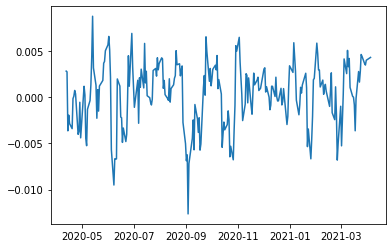

In [ ]:
plt.plot(df['Date'],df['Displacement'].rolling(5).mean())

In [9]:
df1=df[['Date','Volatility','Displacement']]
df1.head()

,Date,Volatility,Displacement
0,2021-04-09,0.008293,0.007981
1,2021-04-08,0.003826,0.001765
2,2021-04-07,0.003637,0.001389
3,2021-04-06,0.004439,-0.000400
4,2021-04-05,0.012140,0.010775


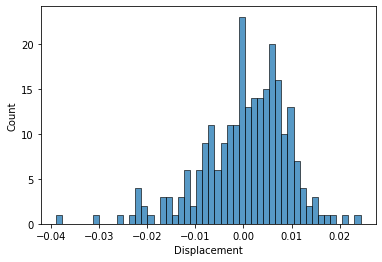

In [ ]:
sns.histplot(data=df1,x='Displacement',bins=50)

5

In [10]:
df1=df1.sort_values('Date',ascending=True).reset_index(drop=True)#Luego de ordenarlos se deben hacer grupos de a 4 dias  (uno de esos sera el resultado)
df1.head()

,Date,Volatility,Displacement
0,2020-04-13,0.022027,-0.007486
1,2020-04-14,0.016666,0.014602
2,2020-04-15,0.014430,-0.004392
3,2020-04-16,0.015071,0.000075
4,2020-04-17,0.017007,0.011304


#Script en prueba (correlation for multiple rolling windows)

In [ ]:
df2=pd.DataFrame(df1)

In [ ]:
df2['TomorrowDisp']=df1[1:]['Displacement'].reset_index(drop=True)

In [ ]:
df2.tail()

,Date,Volatility,Displacement,TomorrowDisp
246,2021-04-05,0.012140,0.010775,-0.000400
247,2021-04-06,0.004439,-0.000400,0.001389
248,2021-04-07,0.003637,0.001389,0.001765
249,2021-04-08,0.003826,0.001765,0.007981
250,2021-04-09,0.008293,0.007981,NaN


In [ ]:
df2=df2[0:250][:]# Eliminando ultima fila del dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


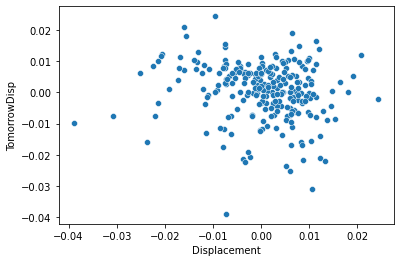

In [ ]:
sns.scatterplot(df2.Displacement,df2.TomorrowDisp)

In [ ]:
df2.Displacement.rolling(2)

Rolling [window=2,center=False,axis=0]

Se debe de sacar la magnitud de correlacion


Having the following matrix
<center>
$M =\begin{bmatrix} D_1&D_2&...&D_{n-1}&D_n\\D_2&D_3&...&D_n&D_{n+1}\\.&.&.&.&.
\\.&.&.&.&.\\D_{t-n+1} & D_{t-n+2} & ... &D_{t-1} &D_t \end{bmatrix};$


Made as :

$M =\begin{bmatrix} M_1&M_2&...&M_{n-1}&M_n \end{bmatrix}$
</center>


Where

$D_i$: is the data of the day $i$ given by $\begin{bmatrix} d_r & v_r  \end{bmatrix}_i$ (in this case).

$n$:is the number of days to analyze 

$t$:is the total of days in the dataset


We must find de correlation of each one of $[M_1,M_2,...,M_{n-1}]$ with $M_n$ for different $n$ values, this way we get a correlation vector defined as:


$V=\begin{bmatrix} \rho(M_1,M_n) & \rho(M_2,M_n) &...& \rho(M_{n-1},M_n)\end{bmatrix}$


And to compare for different n values we are using the following metric:

$m=\frac{\|V\|_1}{n} $

In [ ]:
o=[1,2,-3]
np.mean(np.absolute(o))

2.0

In [ ]:
windows=range(1,21,1) 
a=df1[['Displacement']].to_numpy()
t=a.shape[0]

251

In [ ]:
v=[]

In [ ]:
yd=[]
for n in windows: #where n is the number of total columns
                  #being n the day to predict
  a1=a[0:t-n,:]
  for i in range(0,n,1):
    a1=np.concatenate((a1,a[i+1:t-n+i+1,:]),axis=1)
    if i==n-1: #al acabar de hacer la matriz, se debe sacar el vector de correlaciones
      v=[]
      for j in range(0,n-1,1):
        v.append(np.correlate(a1[:,j],a1[:,n-1])) #Correlacion entre la ultima columna y la columna j
  yd.append(np.mean(np.absolute(v)))


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.002929501

In [ ]:
x=np.arange(1,21,1)
yd=[]
yv=[]
for xi in x:
  yd.append(df2.Displacement.rolling(xi).mean().corr(other=df2.TomorrowDisp) )

for xi in x:
  yv.append(df2.Volatility.rolling(xi).mean().corr(other=df2.TomorrowDisp) )

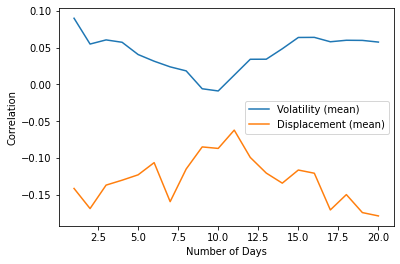

In [ ]:
plt.plot(x,yv,label='Volatility (mean)')
plt.plot(x,yd,label='Displacement (mean)')
plt.ylabel('Correlation')
plt.xlabel('Number of Days')
plt.legend()


Now, lets get the biggest correlation value:

In [ ]:
totalCorr=np.absolute(yv)+np.absolute(yd)
n=np.argmax(totalCorr)+2 #Plus 2 because numpy array index starts in 0, and because n refers tode day to be predicted
n # We are using n-1 days as prediction

21

IndexError: ignored

As we can see in the plot the biggest correlation for the mean of the displacement is: $n$

#Reshaping with numpy with not all rows

In [ ]:
a=df1[['Displacement','Volatility']].to_numpy() #El arreglo de las caracteristicas de cada dia
a[0:4,:]

array([[-7.4862093e-03,  2.2027286e-02],
       [ 1.4601961e-02,  1.6666071e-02],
       [-4.3924772e-03,  1.4429556e-02],
       [ 7.5003729e-05,  1.5071388e-02]], dtype=float32)

In [ ]:
a1=a.reshape([1,a.size])

In [ ]:
n=4 #Numero de dias de entrada
m=n*a[1].size
a1=a1[:,0:floor(a.size/m)*m ].reshape(-1,m)

In [ ]:
#Crear nombres de columnas:
cols=[]
contador=0

for i in a1[0]:
  if (contador % 2) == 0:
    cols.append('V'+str(int(contador/2)))
  else:
    cols.append('D'+str(int(contador/2 - 0.5)))
  contador+=1

cols.reverse()
cols

['D3', 'V3', 'D2', 'V2', 'D1', 'V1', 'D0', 'V0']

In [ ]:
df1.head()

,Date,Volatility,Displacement,TomorrowDisp
0,2020-04-13,0.022027,-0.007486,0.014602
1,2020-04-14,0.016666,0.014602,-0.004392
2,2020-04-15,0.014430,-0.004392,0.000075
3,2020-04-16,0.015071,0.000075,0.011304
4,2020-04-17,0.017007,0.011304,-0.007893


In [ ]:
last_df=pd.DataFrame(a1[:-1,:],columns=cols)
last_df['TomorrowDisp']=a1[1:,0] #Agregando la columna de la prediccion
last_df.head()

,D3,V3,D2,V2,D1,V1,D0,V0,TomorrowDisp
0,-0.007486,0.022027,0.014602,0.016666,-0.004392,0.014430,0.000075,0.015071,0.011304
1,0.011304,0.017007,-0.007893,0.017061,-0.017326,0.020985,0.004096,0.014043,-0.004490
2,-0.004490,0.018019,0.008568,0.018115,0.008348,0.012201,-0.016004,0.020770,0.007213
3,0.007213,0.014631,-0.006305,0.013115,-0.013377,0.016549,0.009851,0.016479,-0.000153
4,-0.000153,0.012088,-0.012042,0.015074,0.001018,0.008839,0.007209,0.010066,0.005097


In [ ]:
cols

['V3', 'D3', 'V2', 'D2', 'V1', 'D1', 'V0', 'D0']

#RESHAPING with all rows
We need to reshape the data into the following matrix

<center>
$\begin{bmatrix} D_1&D_2&...&D_{n-1}&D_n\\D_2&D_3&...&D_n&D_{n+1}\\.&.&.&.&.
\\.&.&.&.&.\\D_{t-n+1} & D_{t-n+2} & ... &D_{t-1} &D_t \end{bmatrix}$
</center>


Being 

$D_i$: the data of the day $i$ given by $\begin{bmatrix} d_r & v_r  \end{bmatrix}_i$ (in this case).

$n$: the number of days to analyze 

$t$: the total of days in the dataset


In this way we ensure that from day $n$ to day $t$ everyone has $n-1$ previous days that can be analyzed as input to the model.

In [11]:
n=4
t=a[:,0].size

NameError: ignored

In [ ]:
a=df1[['Displacement','Volatility']].to_numpy() #El arreglo de las caracteristicas de cada dia
a1=a[0:t-n,:]
a[0:4,:].T

array([[-7.4862093e-03,  1.4601961e-02, -4.3924772e-03,  7.5003729e-05],
       [ 2.2027286e-02,  1.6666071e-02,  1.4429556e-02,  1.5071388e-02]],
      dtype=float32)

In [ ]:
t=a.shape[0]

In [ ]:
for i in range(0,n,1):
  print(i)
  a1=np.concatenate((a1,a[i+1:t-n+i+1,:]),axis=1)


0
1
2
3


In [ ]:
a1[0]

array([-7.4862093e-03,  2.2027286e-02,  1.4601961e-02,  1.6666071e-02,
       -4.3924772e-03,  1.4429556e-02,  7.5003729e-05,  1.5071388e-02,
        1.1303754e-02,  1.7006606e-02], dtype=float32)

In [ ]:
df1.head()

,Date,Volatility,Displacement,TomorrowDisp
0,2020-04-13,0.022027,-0.007486,0.014602
1,2020-04-14,0.016666,0.014602,-0.004392
2,2020-04-15,0.014430,-0.004392,0.000075
3,2020-04-16,0.015071,0.000075,0.011304
4,2020-04-17,0.017007,0.011304,-0.007893


In [ ]:
#Crear nombres de columnas:
cols=["V_p","D_p"]
contador=0

for i in range(0,a1[0].size-2,1):
  if (contador % 2) == 0:
    cols.append('V'+str(int(contador/2)))
  else:
    cols.append('D'+str(int(contador/2 - 0.5)))
  contador+=1

cols.reverse()
cols

['D3', 'V3', 'D2', 'V2', 'D1', 'V1', 'D0', 'V0', 'D_p', 'V_p']

In [ ]:
df1.head()

,Date,Volatility,Displacement,TomorrowDisp
0,2020-04-13,0.022027,-0.007486,0.014602
1,2020-04-14,0.016666,0.014602,-0.004392
2,2020-04-15,0.014430,-0.004392,0.000075
3,2020-04-16,0.015071,0.000075,0.011304
4,2020-04-17,0.017007,0.011304,-0.007893


In [ ]:
last_df=pd.DataFrame(a1[:-1,:],columns=cols)
last_df.head()

,D3,V3,D2,V2,D1,V1,D0,V0,D_p,V_p
0,-0.007486,0.022027,0.014602,0.016666,-0.004392,0.014430,0.000075,0.015071,0.011304,0.017007
1,0.014602,0.016666,-0.004392,0.014430,0.000075,0.015071,0.011304,0.017007,-0.007893,0.017061
2,-0.004392,0.014430,0.000075,0.015071,0.011304,0.017007,-0.007893,0.017061,-0.017326,0.020985
3,0.000075,0.015071,0.011304,0.017007,-0.007893,0.017061,-0.017326,0.020985,0.004096,0.014043
4,0.011304,0.017007,-0.007893,0.017061,-0.017326,0.020985,0.004096,0.014043,-0.004490,0.018019
